# fashion mnist classifier
## used to classify the clothes of 10 classes



In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# read the data from the file

In [11]:
data=pd.read_csv('fashion-mnist_train.csv')
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# split the dataframe into the training and testing data

In [12]:
X_train=data.drop(labels='label',axis=1)
X_train.head()

y_train = data['label']

y_train.head()

0    2
1    9
2    6
3    0
4    3
Name: label, dtype: int64

## visualizing the data

In [13]:
X_train = X_train.values
X_train


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
X_train.shape

(60000, 784)

## for visualizing the data you need to convert the dataframe into the numpy array  and then reshape it into 28*28 dimensions and plot using matplotlib

<img src="labels_table.png" , width=100,height=100>

0

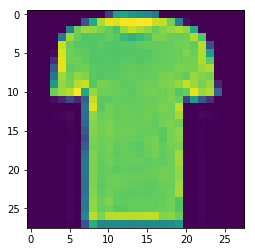

In [15]:
import random
i=random.randint(1,60000)

label=y_train[i]

plt.imshow(X_train[i,:].reshape(28,28))
label


# Viewing more number of images

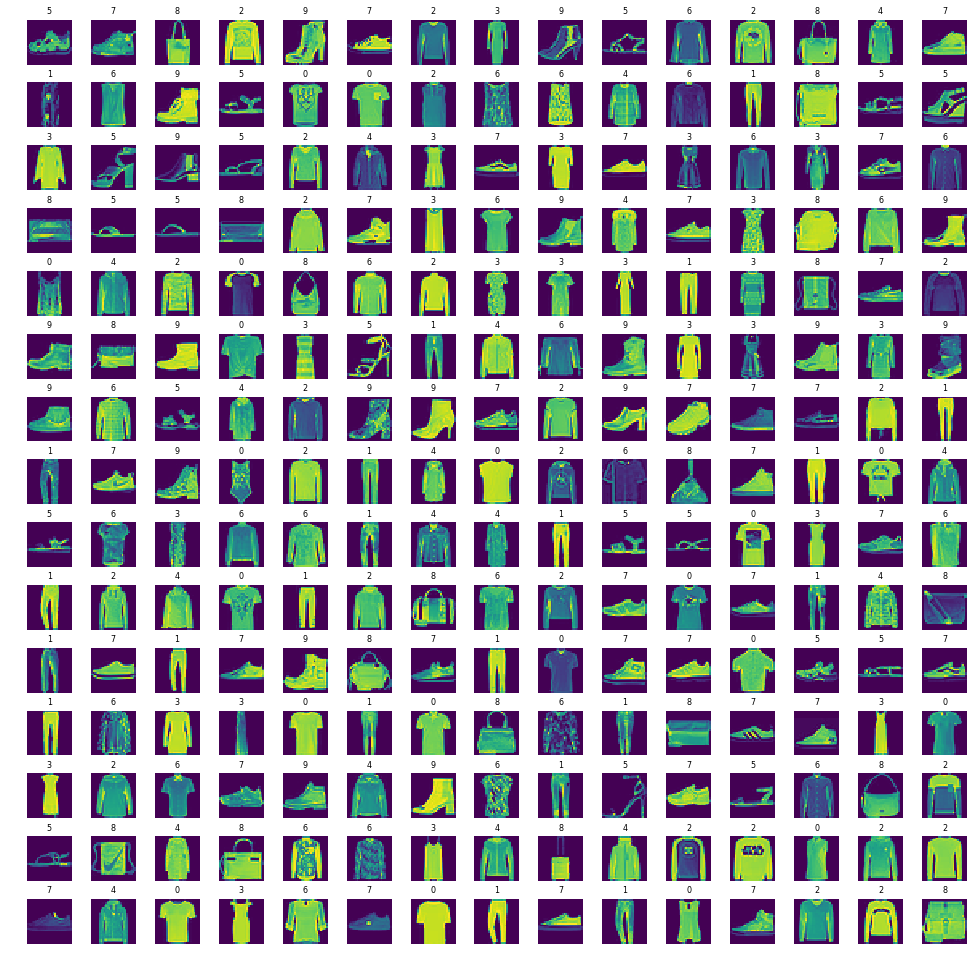

In [16]:
W_grid=15
L_grid=15


fig,axes = plt.subplots(L_grid,W_grid,figsize=(17,17))

axes=axes.ravel() # flatten the array
n_training = len(X_train)  # get the length of the training dataset

for i in np.arange(0,L_grid*W_grid):
    index=np.random.randint(0,n_training)
    axes[i].imshow(X_train[index,:].reshape((28,28)) )
    axes[i].set_title(y_train[index],fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)
    



[Image Kernels Link](http://setosa.io/ev/image-kernels/)

In [17]:
#normalizing the training data
X_train=X_train/255

# Learn about convolution, max-pooling,activation functions

# * Training the model*

# split the training data into training and validation data usink slearn's train_test_split

In [18]:
from sklearn.model_selection import train_test_split


In [19]:
x_train,x_validate,y_train1,y_validate=train_test_split(X_train,y_train,test_size=0.2,random_state=5)

In [20]:
x_train.shape

(48000, 784)

In [21]:
x_train=x_train.reshape(x_train.shape[0],*(28,28,1))
x_validate=x_validate.reshape(x_validate.shape[0],*(28,28,1))


In [22]:
x_train.shape

(48000, 28, 28, 1)

In [23]:
x_validate.shape

(12000, 28, 28, 1)

# * training the model using keras*

In [24]:
import keras

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## each pixel in the image is dependent on the remaining pixels arround the surrounding of them , so we need to perform convolution and max pooling functions 

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


In [26]:
cnn_model=Sequential()

In [27]:
cnn_model.add(Conv2D(32,3,3,input_shape=(28,28,1),activation='relu'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


Instructions for updating:
Colocations handled automatically by placer.


In [28]:
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [29]:
cnn_model.add(Flatten())

In [30]:
cnn_model.add(Dense(output_dim=32,activation='relu'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.


In [31]:
cnn_model.add(Dense(output_dim=10,activation='sigmoid'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  """Entry point for launching an IPython kernel.


In [32]:
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [33]:
epochs=50

In [34]:
cnn_model.fit(x_train,y_train1,
              batch_size=512,
             nb_epoch=epochs,
             verbose=1,
             validation_data=(x_validate,y_validate))

Instructions for updating:
Use tf.cast instead.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 27s 567us/step - loss: 0.9295 - acc: 0.6730 - val_loss: 0.5135 - val_acc: 0.8201
Epoch 2/50
48000/48000 [==============================] - 25s 520us/step - loss: 0.4647 - acc: 0.8378 - val_loss: 0.4480 - val_acc: 0.8427
Epoch 3/50
48000/48000 [==============================] - 25s 524us/step - loss: 0.4185 - acc: 0.8555 - val_loss: 0.4121 - val_acc: 0.8555
Epoch 4/50
48000/48000 [==============================] - 24s 508us/step - loss: 0.3863 - acc: 0.8655 - val_loss: 0.3938 - val_acc: 0.8671
Epoch 5/50
48000/48000 [==============================] - 24s 509us/step - loss: 0.3633 - acc: 0.8742 - val_loss: 0.3685 - val_acc: 0.8720
Epoch 6/50
48000/48000 [==============================] - 25s 511us/step - loss: 0.3445 - acc: 0.8803 - val_loss: 0.3735 - val_acc: 0.8706
Epoch 7/50
48000/48000 [==============================] - 24s 507us/step - loss: 0.3344 - acc: 0.8832 - val_loss: 0.

# get the testing data

In [66]:
test_df = pd.read_csv("fashion-mnist_test.csv")
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
x_test=test_df.drop(labels='label',axis=1)
x_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
x_test = x_test.values
x_test


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [106]:
x_test[0].shape

(28, 28, 1)

In [86]:
#x_test

In [58]:
y_test=test_df['label']
y_test

0       0
1       1
2       2
3       2
4       3
5       2
6       8
7       6
8       5
9       0
10      3
11      4
12      4
13      6
14      8
15      5
16      6
17      3
18      6
19      4
20      4
21      4
22      2
23      1
24      5
25      7
26      8
27      4
28      4
29      1
       ..
9970    5
9971    9
9972    6
9973    0
9974    5
9975    0
9976    8
9977    8
9978    7
9979    2
9980    7
9981    4
9982    5
9983    5
9984    5
9985    0
9986    0
9987    6
9988    7
9989    9
9990    7
9991    9
9992    4
9993    8
9994    0
9995    0
9996    6
9997    8
9998    8
9999    1
Name: label, Length: 10000, dtype: int64

In [70]:
x_test = x_test/255

In [71]:
x_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00392157,
        0.        ],
       [0.        , 0.00392157, 0.01176471, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [72]:
x_test=x_test.reshape(x_test.shape[0],*(28,28,1))

In [109]:
x_test.shape

(10000, 28, 28, 1)

In [110]:
y_predict =cnn_model.predict_classes(x_test)

In [111]:
y_predict

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

# evaluate the model accuracy

In [74]:
from sklearn.metrics import classification_report,confusion_matrix

In [131]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[898,   0,  20,   6,   1,   0,  67,   0,   8,   0],
       [  2, 985,   2,   7,   0,   2,   2,   0,   0,   0],
       [ 18,   1, 920,  11,  21,   0,  27,   0,   2,   0],
       [ 26,  10,  12, 917,  11,   0,  23,   0,   1,   0],
       [  3,   1, 116,  35, 781,   0,  63,   0,   1,   0],
       [  0,   2,   0,   0,   0, 958,   0,  30,   2,   8],
       [162,   2,  77,  20,  29,   0, 705,   0,   5,   0],
       [  0,   0,   0,   0,   0,   4,   0, 982,   0,  14],
       [  2,   0,   5,   2,   3,   2,   8,   4, 973,   1],
       [  0,   0,   0,   0,   0,   6,   0,  51,   0, 943]], dtype=int64)

In [113]:
y_predict

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

TypeError: type numpy.ndarray doesn't define __round__ method

In [81]:
#y_test

In [77]:
x_test.shape

(10000, 28, 28, 1)

In [114]:
evaluation=cnn_model.evaluate(x_test,y_test)


10000/10000 [==============================] - 2s 212us/step


In [116]:
print(evaluation[1])

0.9062


In [117]:
y_predict

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

In [119]:
print(classification_report(y_test,y_predict))


             precision    recall  f1-score   support

          0       0.81      0.90      0.85      1000
          1       0.98      0.98      0.98      1000
          2       0.80      0.92      0.86      1000
          3       0.92      0.92      0.92      1000
          4       0.92      0.78      0.85      1000
          5       0.99      0.96      0.97      1000
          6       0.79      0.70      0.74      1000
          7       0.92      0.98      0.95      1000
          8       0.98      0.97      0.98      1000
          9       0.98      0.94      0.96      1000

avg / total       0.91      0.91      0.91     10000



In [120]:
file1 = open("file1.txt","w")

In [125]:
file1.writelines(str(y_predict))

In [126]:
file1.close()

In [127]:
print(y_predict)

[0 1 2 ... 8 8 1]


In [128]:
y_predict

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

In [129]:
y_predict.shape

(10000,)

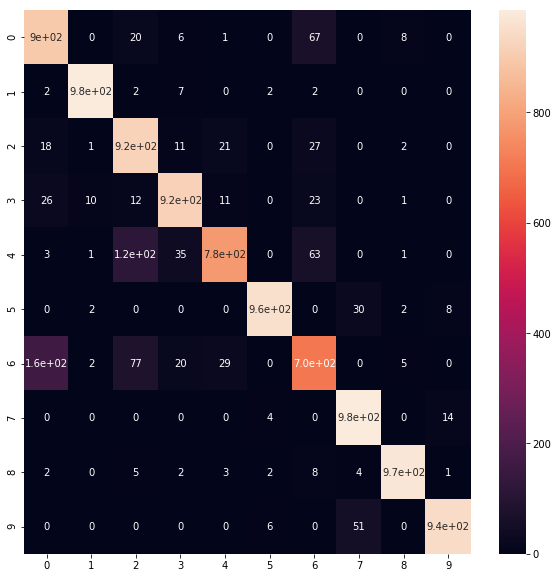

In [135]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)
